In [1]:
import pandas as pd
import numpy as np

In [2]:
def extract_header(filename, comment_prefix, header_row_index, header_row_delimiter):
    '''
    Extracts the header from a file. 

    Parameters
    ----------
    filename : str
        The name of the file to extract the header from.

    comment_prefix : str
        The character that indicates a comment in the file.

    header_row_index : int
        The index of the row that contains the header (often last index=-1).

    header_row_delimiter : str
        The character that separates the header elements.

        
    Returns
    -------
    list
        The header elements 

    '''
    with open(filename, 'r') as file:
        lines = file.readlines()

        header = []
        for line in lines:
            if line[0] == comment_prefix:
                header.append(line)

    
    header_extract = header[header_row_index]
    header_extract = header_extract.replace(comment_prefix, '')
    split_header = header_extract.split(header_row_delimiter)
    return_header = [x.strip() for x in split_header]
    
    return return_header


In [3]:
header = extract_header('Land_and_Ocean_summary.txt', 
                         comment_prefix='%', 
                         header_row_index=-1, 
                         header_row_delimiter=',')

print(header)

['Year', 'Annual Anomaly', 'Annual Unc.', 'Five-year Anomaly', 'Five-year Unc.', 'Annual Anomaly', 'Annual Unc.', 'Five-year Anomaly', 'Five-year Unc.']


In [4]:
def read_anomaly_data_into_dataframe(filename, header, max_cols, comment_prefix):
    '''
    A function that reads data into a Pandas DataFrame. Makes the first column of the data the index.

    Parameters
    ----------
    filename : str
        The name of the file to read.

    header : list
        The header elements.

    max_cols : int
        The maximum number of columns to read.

    comment_prefix : str
        The character that indicates a comment in the file.

        
    Returns
    -------
    DataFrame
        The data in a Pandas DataFrame.
    
    '''
    header = header[:max_cols]
    anomaly_df = pd.read_table(filename, 
                               delimiter=r'\s+', 
                               comment=comment_prefix, 
                               names=header, 
                               usecols=range(max_cols), index_col=False)
    
    anomaly_df.set_index(header[0], inplace=True)
    
    return anomaly_df

In [5]:
anomaly_df = read_anomaly_data_into_dataframe('Land_and_Ocean_summary.txt', header, max_cols=5, comment_prefix='%')
anomaly_df


,Annual Anomaly,Annual Unc.,Five-year Anomaly,Five-year Unc.
Year,,,,
1850,-0.532,0.154,NaN,NaN
1851,-0.405,0.169,NaN,NaN
1852,-0.395,0.165,-0.423,0.121
1853,-0.418,0.158,-0.384,0.109
1854,-0.363,0.142,-0.400,0.090
...,...,...,...,...
2014,0.675,0.045,0.728,0.040
2015,0.814,0.043,0.777,0.041
2016,0.949,0.044,0.808,0.040


In [6]:
def anomaly_avg_per_decade(anomaly_df):
    '''
    A function that calculates the average temperature anomaly per decade. 
    The functions groups the data into decades and calculates the average anomaly for each decade.

    Parameters
    ----------
    anomaly_df : DataFrame
        The data in a Pandas DataFrame.

    
    Returns
    -------
    Series
        The average anomaly per decade.

    '''
    anomaly_df['Decade'] = (anomaly_df.index // 10) * 10
    dec_grp = anomaly_df.groupby('Decade')
    anomaly_dev_avg = dec_grp['Annual Anomaly'].mean()
    return anomaly_dev_avg    

    


In [7]:
anomalies_per_decade = anomaly_avg_per_decade(anomaly_df)
print(anomalies_per_decade)

Decade
1850   -0.441500
1860   -0.406900
1870   -0.297600
1880   -0.403400
1890   -0.391000
1900   -0.395700
1910   -0.402900
1920   -0.250800
1930   -0.128200
1940    0.013200
1950   -0.015800
1960   -0.015100
1970   -0.007300
1980    0.169800
1990    0.338600
2000    0.551000
2010    0.723222
Name: Annual Anomaly, dtype: float64


<Axes: title={'center': 'Average temperature anomaly per decade'}, xlabel='Decade', ylabel='Temperature anomaly'>

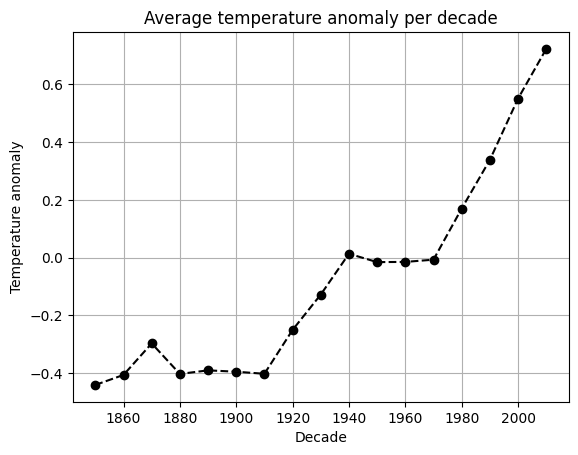

In [8]:
anomalies_per_decade.plot(ls='--', marker='o', color='k', grid=True, title='Average temperature anomaly per decade', ylabel='Temperature anomaly')
